<a href="https://colab.research.google.com/github/dev-bhaveshye/Machine-Learning/blob/main/Handling_Missing_Data(Mean_Median).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt
  import seaborn as sns
  import warnings
  warnings.filterwarnings('ignore')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df=pd.read_csv('/content/titanic_toy.csv')
df.sample(10)

,Age,Fare,Family,Survived
10,4.0,16.7000,2,1
818,43.0,6.4500,0,0
887,19.0,30.0000,0,1
161,40.0,15.7500,0,1
719,33.0,7.7750,0,0
780,13.0,7.2292,0,1
288,42.0,13.0000,0,1
439,31.0,10.5000,0,0
802,11.0,120.0000,3,1
529,23.0,11.5000,3,0


In [ ]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


In [ ]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
x_train.shape , y_train.shape

((668, 3), (668,))

In [ ]:
x_train['Age'].isnull().value_counts() , x_train['Fare'].isnull().value_counts(),x_train['Family'].isnull().value_counts()

(Age
 False    538
 True     130
 Name: count, dtype: int64,
 Fare
 False    633
 True      35
 Name: count, dtype: int64,
 Family
 False    668
 Name: count, dtype: int64)

In [ ]:
mean_age =x_train['Age'].mean()
mean_fare =x_train['Fare'].mean()

median_age=x_train['Age'].median()
median_fare=x_train['Fare'].median()



In [ ]:
x_train['Age_Mean']=x_train['Age'].fillna(mean_age)
x_train['Fare_Mean']=x_train['Fare'].fillna(mean_fare)

x_train['Age_Median']=x_train['Age'].fillna(median_age)
x_train['Fare_Median']=x_train['Fare'].fillna(median_fare)


In [ ]:
x_train.shape

(668, 7)

In [ ]:
x_train

,Age,Fare,Family,Age_Mean,Fare_Mean,Age_Median,Fare_Median
522,NaN,7.2250,0,29.822026,7.225000,29.0,7.2250
98,34.0,NaN,1,34.000000,32.290704,34.0,14.4000
694,60.0,26.5500,0,60.000000,26.550000,60.0,26.5500
814,30.5,8.0500,0,30.500000,8.050000,30.5,8.0500
679,36.0,512.3292,1,36.000000,512.329200,36.0,512.3292
...,...,...,...,...,...,...,...
276,45.0,7.7500,0,45.000000,7.750000,45.0,7.7500
451,NaN,19.9667,1,29.822026,19.966700,29.0,19.9667
763,36.0,NaN,3,36.000000,32.290704,36.0,14.4000
376,22.0,7.2500,0,22.000000,7.250000,22.0,7.2500


In [ ]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['Age_Median'].var())
print('Age Variance after mean imputation: ', x_train['Age_Mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['Fare_Median'].var())
print('Fare Variance after mean imputation: ', x_train['Fare_Mean'].var())

Original Age variable variance:  214.1620243792099
Age Variance after median imputation:  172.52737045017952
Age Variance after mean imputation:  172.4212999874599
Original Fare variable variance:  2764.8958948408917
Fare Variance after median imputation:  2635.7270508357556
Fare Variance after mean imputation:  2619.8114026078615


(<Axes: xlabel='Age_Mean', ylabel='Density'>,
 <Axes: xlabel='Age_Mean', ylabel='Density'>,
 <Axes: xlabel='Age_Mean', ylabel='Density'>)

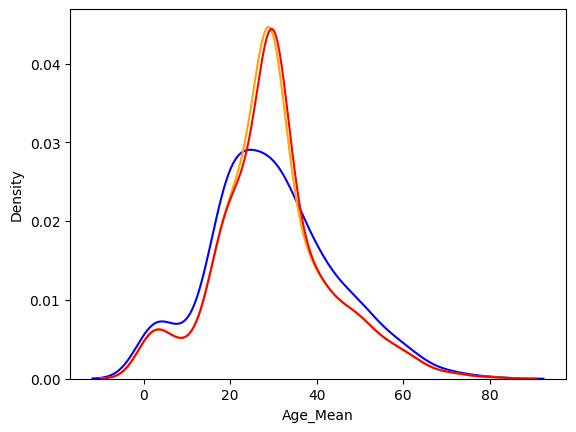

In [ ]:
sns.distplot(x_train['Age'],color='blue',label='Age',hist=False),sns.distplot(x_train['Age_Median'],label="Age_Median",color='orange',hist=False),sns.distplot(x_train['Age_Mean'],label='Age_Mean',color='red',hist=False)

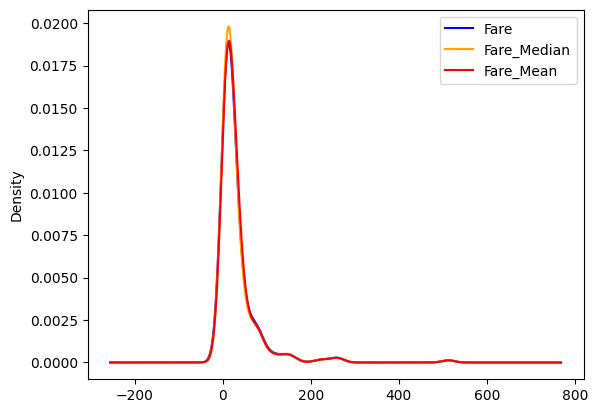

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Fare'].plot(kind='kde',ax=ax,color='blue',label='Fare')
x_train['Fare_Median'].plot(kind='kde',ax=ax,color='orange',label='Fare_Median')
x_train['Fare_Mean'].plot(kind='kde',ax=ax,color='red',label='Fare_Mean')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [ ]:
x_train.cov()

,Age,Fare,Family,Age_Mean,Fare_Mean,Age_Median,Fare_Median
Age,214.162024,113.966549,-6.948394,214.162024,107.413244,214.162024,107.612568
Fare,113.966549,2764.895895,17.057664,91.267266,2764.895895,92.792561,2764.895895
Family,-6.948394,17.057664,2.716595,-5.594135,16.162584,-5.563025,16.179810
Age_Mean,214.162024,91.267266,-5.594135,172.421300,86.478129,172.421300,86.638604
Fare_Mean,107.413244,2764.895895,16.162584,86.478129,2619.811403,87.923386,2619.811403
Age_Median,214.162024,92.792561,-5.563025,172.421300,87.923386,172.527370,88.021873
Fare_Median,107.612568,2764.895895,16.179810,86.638604,2619.811403,88.021873,2635.727051


In [ ]:
x_train.corr()

,Age,Fare,Family,Age_Mean,Fare_Mean,Age_Median,Fare_Median
Age,1.000000,0.138450,-0.308407,1.000000,0.135251,1.000000,0.135001
Fare,0.138450,1.000000,0.194327,0.131738,1.000000,0.133897,1.000000
Family,-0.308407,0.194327,1.000000,-0.258479,0.191586,-0.256962,0.191210
Age_Mean,1.000000,0.131738,-0.258479,1.000000,0.128670,0.999693,0.128519
Fare_Mean,0.135251,1.000000,0.191586,0.128670,1.000000,0.130780,0.996976
Age_Median,1.000000,0.133897,-0.256962,0.999693,0.130780,1.000000,0.130530
Fare_Median,0.135001,1.000000,0.191210,0.128519,0.996976,0.130530,1.000000


<Axes: >

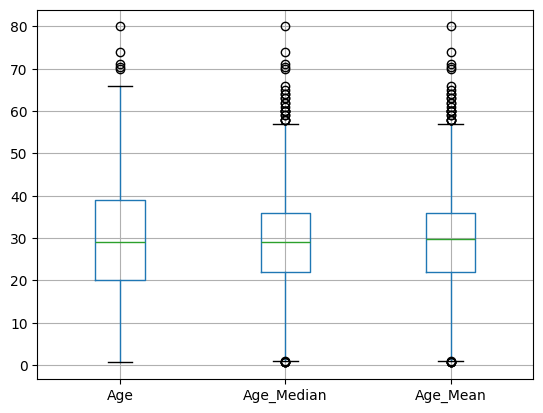

In [ ]:
x_train[['Age', 'Age_Median', 'Age_Mean']].boxplot()

<Axes: >

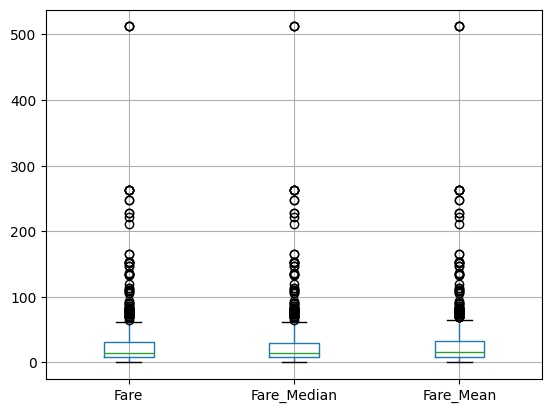

In [ ]:
x_train[['Fare', 'Fare_Median', 'Fare_Mean']].boxplot()

**Using Sklearn**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
imputer1=SimpleImputer(strategy='mean')
imputer2=SimpleImputer(strategy='median')

In [ ]:
trf=ColumnTransformer([
    ('mean_age',imputer1,['Age']),
    ('median_fare',imputer2,['Fare'])
],remainder='passthrough')

In [ ]:
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('mean_age', SimpleImputer(), ['Age']),
                                ('median_fare',
                                 SimpleImputer(strategy='median'), ['Fare'])])

In [ ]:
trf.named_transformers_['mean_age'].statistics_

array([29.85757974])

In [ ]:
trf.named_transformers_['median_fare'].statistics_

array([14.2])

In [ ]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)


In [ ]:
x_train

array([[29.85757974,  7.75      ,  0.        ],
       [18.        ,  7.775     ,  0.        ],
       [ 4.        , 27.9       ,  5.        ],
       ...,
       [50.        , 28.7125    ,  0.        ],
       [50.        , 10.5       ,  0.        ],
       [29.85757974,  8.05      ,  0.        ]])

In [ ]:
pd.DataFrame(x_train,columns=['Age','Fare','Family'])

,Age,Fare,Family
0,29.85758,7.7500,0.0
1,18.00000,7.7750,0.0
2,4.00000,27.9000,5.0
3,24.00000,73.5000,2.0
4,29.00000,21.0750,4.0
...,...,...,...
663,22.00000,66.6000,1.0
664,18.00000,7.7750,0.0
665,50.00000,28.7125,0.0
666,50.00000,10.5000,0.0


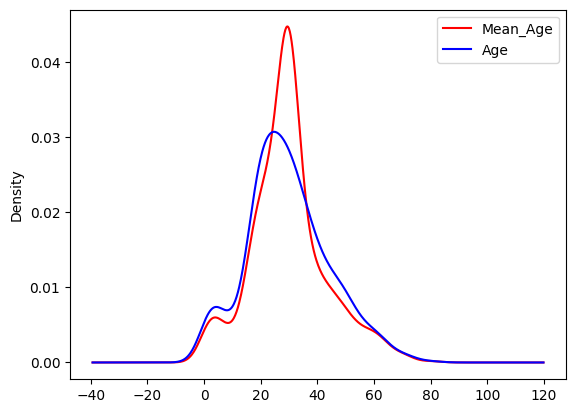

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
pd.Series(x_train[:,0]).plot(kind='kde',ax=ax,color='red',label='Mean_Age')
df['Age'].plot(kind='kde',ax=ax,color='blue',label='Age')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()



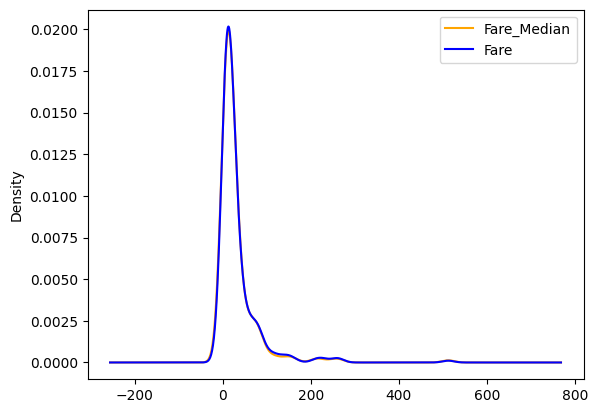

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111)
pd.Series(x_train[:,1]).plot(kind='kde',ax=ax,color='orange',label='Fare_Median')
df['Fare'].plot(kind='kde',ax=ax,color='blue',label='Fare')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()